# Data exploration and hypothesis testing: Waze Churn Prevention Project

**Background on the Waze Scenario:**

Waze's free navigation app simplifies travel for drivers worldwide. The collaborative effort of map editors, beta testers, translators, partners, and users ensures each journey is optimized for safety and efficiency. Collaborations with cities, transportation authorities, broadcasters, businesses, and first responders further Waze's commitment to facilitating safer and more efficient travel experiences.

In this project, **our primary objective** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test and apply descriptive statistics and hypothesis testing in Python.

The project employs a dataset titled 'waze_dataset.csv,' meticulously curated through a partnership between Google and Waze, containing synthetic data exclusively generated for this collaborative initiative.

**Key dataset specifications:**

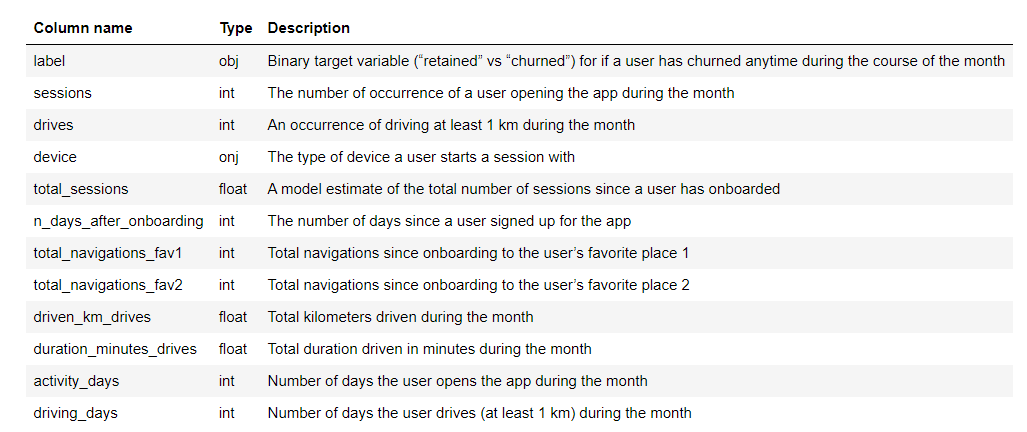
    



## Imports and data loading
Packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
# Import statements, packages and/or libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

Read the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

## Data exploration
In the dataset, device is a categorical variable with the labels iPhone and Android. In order to perform the analysis, we must turn each label into an integer. Use code to assigns a 1 for an iPhone user and a 2 for Android.

In [3]:
# 1. Create `map_dictionary`
map_dictionary = {'iPhone': 1, 'Android': 2}
# 2. Create new `device_type` column
df['device_type'] = df['device']
# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2


You could be interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type.

In [4]:
print(df[['device_type', 'drives']].groupby('device_type').mean())

                drives
device_type           
1            67.859078
2            66.231838


Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a **hypothesis test.**

## Hypothesis testing

Our goal is to conduct a two-sample t-test.Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

**Note** 
A t-test for two independent samples is a statistical test used to determine if there is a significant difference between the means of two independent groups. It assesses whether the average scores or measurements in two distinct populations are significantly different from each other.

### State the null hypothesis and the alternative hypothesis
$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

###  Choose a signficance level

We will choose 5% as the significance level and proceed with a two-sample t-test.

**Note**
A significance level, is a critical value that researchers choose to determine the level of significance in hypothesis testing. In the context of hypothesis testing using statistical methods like t-tests, the significance level represents the probability of rejecting the null hypothesis when it is actually true.

When a significance level of 5% (or 0.05) is chosen, it means that there is a 5% chance of incorrectly rejecting the null hypothesis. In other words:

* If the p-value obtained from a statistical test (such as a t-test) is less than 0.05, you would typically reject the null hypothesis in favor of the alternative hypothesis.
* If the p-value is greater than 0.05, you would fail to reject the null hypothesis.

A significance level of 5% is a common choice and is often used in many scientific studies and research fields. It signifies a moderate level of certainty in rejecting the null hypothesis if the evidence against it is sufficiently strong

### Find the p-value
We can use the stats.ttest_ind() function to perform the test.

In [5]:
# 1. Isolate the `drives` column for iPhone users.
iphone = df[df['device'] == 'iPhone']
# 2. Isolate the `drives` column for Android users.
android = df[df['device'] == 'Android']
# 3. Perform the t-test
stats.ttest_ind(a=iphone['drives'], b=android['drives'], equal_var=False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

### Reject or fail to reject the null hypothesis
The **p-value(14.33%)** is greater than the significance **level(5%)**, we can conclude that there is not a statistically significant difference in the mean district literacy rates between iphone and android users. In other words, we will fail to reject the null hypothesis  𝐻0 .

## Conclusion

The drivers who use iPhone devices on average have a similar number of drives as those who use Android.